<a href="https://colab.research.google.com/github/dsogden/Quantitative_Finance/blob/main/Long_Short_Equity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [12]:
current_factor_values = np.random.normal(0, 1, 10000)
equity_names = [f'Equity{x}' for x in range(10000)]

factor_data = pd.Series(current_factor_values, index=equity_names)
factor_data = pd.DataFrame(factor_data, columns=['Factor_Value'])
factor_data.head(10)

,Factor_Value
Equity0,-0.438616
Equity1,-0.232810
Equity2,-0.354202
Equity3,0.314733
Equity4,-0.344042
Equity5,0.017584
Equity6,-1.965288
Equity7,-1.170673
Equity8,-1.361879
Equity9,-0.132870


In [13]:
future_returns = current_factor_values + np.random.normal(0, 1, 10000)
returns_data = pd.Series(future_returns, index=equity_names)
returns_data = pd.DataFrame(returns_data, columns=['Returns'])
data = factor_data.join(returns_data)
data.head(10)

,Factor_Value,Returns
Equity0,-0.438616,-0.430524
Equity1,-0.232810,0.953840
Equity2,-0.354202,-0.060948
Equity3,0.314733,-1.130455
Equity4,-0.344042,-2.065921
Equity5,0.017584,-1.009500
Equity6,-1.965288,-0.792602
Equity7,-1.170673,-1.312622
Equity8,-1.361879,-1.424098
Equity9,-0.132870,-0.357203


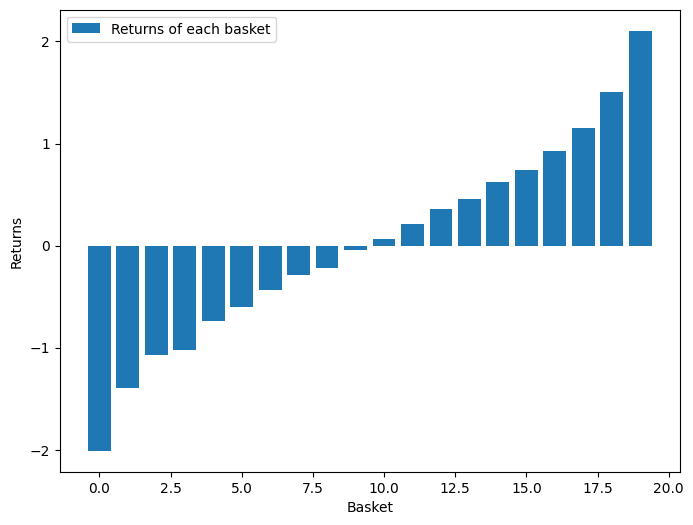

In [14]:
ranked_data = data.sort_values('Factor_Value')
number_of_baskets = int(10000 / 500)
basket_returns = np.zeros((number_of_baskets, ))

for i in range(number_of_baskets):
    start = i * 500
    end = i * 500 + 500
    basket_returns[i] = ranked_data[start: end]['Returns'].mean()

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(range(number_of_baskets), basket_returns)
ax.set_ylabel('Returns')
ax.set_xlabel('Basket')
ax.legend(['Returns of each basket'])
plt.show()

In [15]:
ranked_data

,Factor_Value,Returns
Equity1139,-3.512933,-4.237566
Equity4174,-3.444455,-4.642096
Equity1114,-3.344840,-2.165196
Equity7384,-3.342785,-3.788931
Equity6173,-3.317430,-2.996962
...,...,...
Equity6761,3.508641,4.727559
Equity9340,3.600778,3.194307
Equity8871,3.602811,4.521710
Equity6355,3.726352,3.237627


In [16]:
basket_returns

array([-2.00933849, -1.39162275, -1.06722085, -1.01951004, -0.7342026 ,
       -0.59765816, -0.43460714, -0.28879679, -0.21586002, -0.04346588,
        0.06583352,  0.20979321,  0.35739746,  0.45386211,  0.62608623,
        0.73589078,  0.92737775,  1.148047  ,  1.50880233,  2.10492234])

In [17]:
basket_returns[number_of_baskets - 1] - basket_returns[0]

4.114260832002669

## Market Neutrality is Builtin

In [18]:
current_factor_values = np.random.normal(0, 1, 10000)
equity_names = [f'Equity{x}' for x in range(10000)]

factor_data = pd.Series(current_factor_values, index=equity_names)
factor_data = pd.DataFrame(factor_data, columns=['Factor_Value'])

future_returns = -10 + current_factor_values + np.random.normal(0, 1, 10000)
returns_data = pd.Series(future_returns, index=equity_names)
returns_data = pd.DataFrame(returns_data, columns=['Returns'])
data = factor_data.join(returns_data)

ranked_data = data.sort_values('Factor_Value')
n_baskets = int(10000/ 500)
basket_returns = np.zeros((n_baskets, ))

for i in range(n_baskets):
    start = i * 500
    end = i * 500 + 500
    basket_returns[i] = ranked_data[start:end]['Returns'].mean()

basket_returns[n_baskets - 1] - basket_returns[0]

4.148297387569066